In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score

In [2]:
# 클러스터링 학습을 위한 임의의 데이터 10개 생성
# 두 분류로 나누게 끔 데이터를 생성해주었다.
x = [5, 10, 15, 24, 30, 85, 71, 60, 70, 80]
y = [3, 15, 12, 10, 30, 70, 80, 78, 55, 91]
data = np.array([x, y])
data = data.T

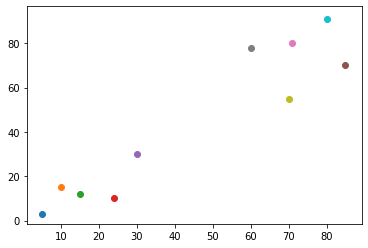

In [3]:
for i in range(0, len(data)):
    plt.scatter(data[i][0], data[i][1])
plt.show()

In [4]:
# 나중에 예측정도를 확인하기 위해 두 그룹을 0과 1로 나누어준다.
z = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

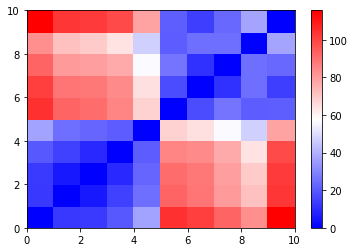

In [5]:
# 각 점들 사이의 거리를 히트맵으로 표현하였다.
# 히트맵 색상으로 보았을 때 두분류로 나눠지는 것을 확인할 수 있다.
D = pairwise_distances(data, metric = 'euclidean')
plt.pcolor(D, cmap='bwr')
plt.colorbar()

In [6]:
# 먼저 군집분석에 앞서 kmeans와 계층적 군집은 직접 군집의 수를 결정해주어야한다.
# 그렇기 때문에 적절한 군집의 수를 결정하는 척도가 필요하다.
# WSS(Within-Cluster-Sum of Squared Errors)를 이용하여 알맞은 군집의 수를 체크해보자.
wss = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    """ inertia를 직접 계산한 식이다.
    D = cdist(data, kmeans.cluster_centers_, 'euclidean')
    within = np.min(D, axis=1)
    total = (sum(within))**2
    """
    total = kmeans.inertia_
    wss.append(total)

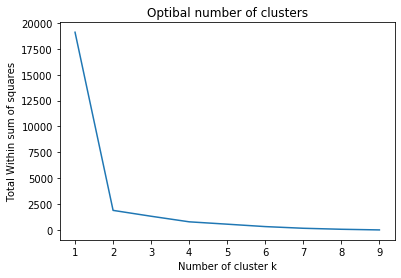

In [7]:
# 군집이 1개, 2개, ...., k개가 있을 때 군집의 중심과 데이터들의 
# 거리의 제곱의 합을 계산하여 변동 폭을 보고 군집의 수를 결정한다.
# 변동 폭이 가장 클 때를 선택하는 것이 좋은 모델 선택이라고 할 수 있다.
plt.plot(k_range, wss)
plt.xlabel('Number of cluster k')
plt.ylabel('Total Within sum of squares')
plt.title('Optibal number of clusters')
plt.show()

In [8]:
# 군집화가 얼마나 잘되었나 평가하는 지표
# 실루엣의 평균이 0.7이상이면 잘 분류되었다고 평가한다.

silhouette = []
k_range = range(2, 5)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    silhouette_avg = silhouette_score(data, kmeans.labels_)
    silhouette.append(silhouette_avg)
silhouette

[0.7485057741241999, 0.512425310981696, 0.33786542804523606]

Text(0.5, 1.0, 'Optibal number of clusters')

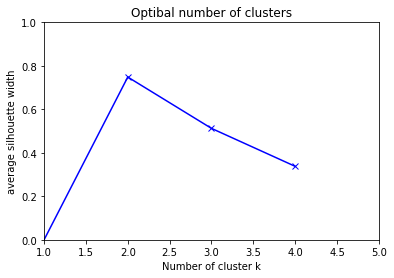

In [9]:
# 실루엣은 군집화가 얼마나 잘되었나 평가하는 지표
# 실루엣의 평균이 0.7이상이면 잘 분류되었다고 평가한다.
# 밑의 그래프에선 군집의 갯수가 2개일 때 실루엣의 평균이 제일 높으므로
# 군집화가 잘 된것을 확인할 수 있다.
plt.plot([1, 2], [0, silhouette[0]], c='blue')
plt.plot(k_range, silhouette, 'bx-')
plt.xlim(1, 5)
plt.xlabel('Number of cluster k')
plt.ylim(0, 1)
plt.ylabel('average silhouette width')
plt.title('Optibal number of clusters')

In [10]:
# kmeans.cluster_centers_, kmeans.labels_을 통해 군집의 중심과 
# 데이터가 어떤 군집에 속하는지 알 수 있다.
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[16.8 14. ]
 [73.2 74.8]]
[0 0 0 0 0 1 1 1 1 1]


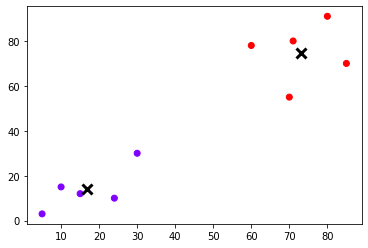

In [11]:
# 위 결과에 의해 군집의 수를 2개로 잡고 kmeans로 분석한다.
# 그래프를 확인해본 결과 군집 2개로 나누어진 것을 볼 수 있다.
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker='x', s=100, linewidth=3, c='black')
plt.show()

In [12]:
# 장점
# k-means clustering과 다르게 클러스터의 수를 지정할 필요가 없으며, 알고리즘이 자동으로 클러스터의 수를 찾는다.
# 원 모양의 클러스터뿐만 아니라, 불특정한 모양의 클러스터도 찾을 수 있다.
# 클러스터링을 수행하는 동시에 노이즈 데이터도 분류할 수 있기 때문에 outlier에 의해 클러스터링 성능이 하락하는 현상을 완화할 수 있다.
# k-means clustering은 데이터의 수에 대해 linear time complexity 갖지만, DBSCAN은 quadratic time complexity를 갖는다.

# 단점
# 데이터가 입력되는 순서에 따라 클러스터링 결과가 변한다.
# 알고리즘이 이용하는 거리 측정 방법에 따라 클러스터링 결과가 변한다.
# 데이터의 특성을 모를 경우에는 알고리즘의 적절한 hyper-parameter를 설정하기가 어렵다.

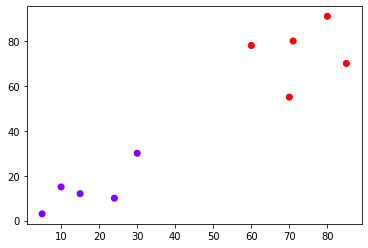

In [13]:
# DBSCAN은 앞에서 보았던 두개의 분석과는 다르게 군집의 수를 정해주는 것이 아닌
# 군집을 결정짓는 거리와 군집을 이루는 최소 데이터의 수를 정해주는 방법이다.
# 이 방법은 정확도가 매우 높지만 원형의 모양에서 잘되는 성질이 있다.
# 군집의 거리를 30, 최소 데이터 수를 2개로 두고 분석을 진행한다.
# 그래프를 확인하였을 때 아래와 같이 두 그룹으로 나눠진 것을 확인할 수 있다.
db = DBSCAN(eps=30, min_samples=2)
db.fit(data)
plt.scatter(data[:,0], data[:,1], c=db.labels_, cmap='rainbow')

In [14]:
# 군집 분석은 모델성능검증을 하기가 매우 까다롭다.
# 그렇기에 몇 안되는 모델성능검증 방법을 가지고 있다.
# adjusted_mutual_info_score과 adjusted_rand_score이다.
# 맨 처음 언급했던 z와 예측한 pred를 비교해 보았을 때 그룹이 완벽하게
# 일치하면서 두 스코어 전부 1인 것을 확인할 수 있다.
pred = db.fit_predict(data)
print("ARI:", adjusted_rand_score(z, pred))
print("AMI:", adjusted_mutual_info_score(z, pred))

ARI: 1.0
AMI: 1.0


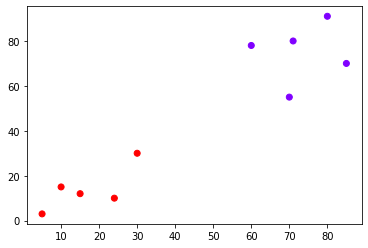

In [15]:
# AgglomerativeClustering(계층적 군집분석)으로 군집분석을 실시해 보았다.
# 클러스터를 2개로 지정해주고 유클리안거리 와드연결법을 사용해 모델을 생성해준다.
# 그래프를 확인해 보았을 때 아래와 같이 잘 분류되었음을 확인할 수 있다.

AC = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
AC.fit_predict(data)
plt.scatter(data[:,0], data[:,1], c=AC.labels_, cmap='rainbow')

{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [14.375, 14.375, 71.25, 71.25]],
 'dcoord': [[0.0, 5.830951894845301, 5.830951894845301, 0.0],
  [0.0, 13.880441875771343, 13.880441875771343, 5.830951894845301],
  [0.0, 17.98147194568157, 17.98147194568157, 13.880441875771343],
  [0.0, 32.796341259353916, 32.796341259353916, 17.98147194568157],
  [0.0, 21.213203435596427, 21.213203435596427, 0.0],
  [0.0, 11.180339887498949, 11.180339887498949, 0.0],
  [0.0, 21.73323108360405, 21.73323108360405, 11.180339887498949],
  [21.213203435596427,
   33.64322616317684,
   33.64322616317684,
   21.73323108360405],
  [32.796341259353916,
   185.44001725625458,
   185.44001725625458,
   33.64322616317684]],
 'ivl': [5, 1, 4, 2, 3, 6, 9, 10, 7, 8],
 'leaves': [4, 0, 3, 1, 2, 5, 8, 9, 6, 7],
 'color_list': ['g', 'g'

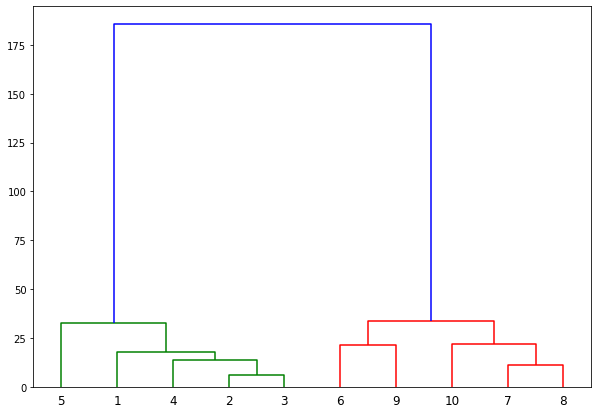

In [16]:
# scipy.cluster.hierarchy의 dendrogram으로 덴드로그램도 그릴 수 있다.
linked = linkage(data, 'ward')
labelList = range(1, 11)
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=labelList, 
           distance_sort='descending', show_leaf_counts=True)